In [1]:
#Importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("spotify_history.csv") #leitura do arquivo csv

df.head() #Mostra as 5 primeiras linhas do dataframe,
df.info() #Exibe informações das colunas, tipos e quantidade de dados não nulos, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [36]:
novo_df = df.drop(columns=["spotify_track_uri"]) #Remoção da coluna desnecessária

novo_df["data_hora"] = pd.to_datetime(novo_df["ts"]) # Conversão da coluna ts para datetime
# criou nova coluna data_hora, transformando o texto da coluna ts em um formato que o pandas entende como data e hora reais

novo_df["data"] = novo_df["data_hora"].dt.date #crio coluna apenas com a data, sem horas.

In [37]:
novo_df.head()

,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,data_hora,data
0,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2013-07-08 02:44:34,2013-07-08
1,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2013-07-08 02:45:37,2013-07-08
2,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2013-07-08 02:50:24,2013-07-08
3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2013-07-08 02:52:40,2013-07-08
4,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,2013-07-08 03:17:52,2013-07-08


In [ ]:
menor_data = novo_df["data"].min() #Calcula a data mais antiga que aparece no ds

print(menor_data)

2013-07-08


In [ ]:
maior_data = novo_df["data"].max() #Calcula a data mais recente que aparece no ds
print(maior_data)

2024-12-15


In [40]:
novo_df["ms_played"].describe() # quanto tempo cada faixa foi tocada.

count    1.498600e+05
mean     1.283166e+05
std      1.178401e+05
min      0.000000e+00
25%      2.795000e+03
50%      1.388400e+05
75%      2.185070e+05
max      1.561125e+06
Name: ms_played, dtype: float64

In [41]:
novo_df["artist_name"].value_counts().head() #quantas vezes cada artista foi ouvido.

artist_name
The Beatles       13621
The Killers        6878
John Mayer         4855
Bob Dylan          3814
Paul McCartney     2697
Name: count, dtype: int64

In [ ]:
mais_tocadas = novo_df.groupby(["track_name"])["ms_played"].sum() #Agrupa nome da música e soma o tempo total tocado, mostra as músicas mais executadas.

mais_tocadas.sort_values(ascending=False).head(5) #Exibe as 5 músicas com maior tempo total de execução.



track_name
Ode To The Mets                                                                        67431580
The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)     64401661
The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)    44756730
19 Dias y 500 Noches - En Directo                                                      42914042
In the Blood                                                                           38427087
Name: ms_played, dtype: int64

In [ ]:
puladas = novo_df[novo_df["skipped"] == True] #cria uma tabela só com linhas onde a música foi pulada pelo usuário.

puladas_count = puladas.groupby("track_name").size()  #quantas vezes a musica foi pulada

total_execusoes = novo_df.groupby("track_name").size() # total de execuções por música


taxa_de_pulos = puladas_count / total_execusoes # Calcula o percentual (ou taxa) de vezes que cada música foi pulada 

taxa_de_pulos.sort_values(ascending=False).head(5) #top 5 músicas com maior taxa de pulo.




track_name
Ámame                       1.0
Your Flesh Is So Nice       1.0
Younger                     1.0
Young Again - Radio Edit    1.0
Young & Set                 1.0
dtype: float64

In [ ]:
# Lista todas as plataformas diferentes presentes, usei só para ver a diferença de letras maiúsculas e minúsculas.

novo_df["platform"].unique() 

array(['web player', 'windows', 'android', 'iOS', 'cast to device', 'mac'],
      dtype=object)

In [45]:
# pega cada valor de texto e converte para minúsculo.

novo_df["platform"] = novo_df["platform"].str.lower()

In [46]:
# confere de novo com unique() para ver se deu certo a conversão

novo_df["platform"].unique()

array(['web player', 'windows', 'android', 'ios', 'cast to device', 'mac'],
      dtype=object)

In [ ]:
# Qual plataforma é a mais usada para ouvir música, conta quantas vezes cada plataforma foi usada


novo_df["platform"].value_counts()


platform
android           139821
cast to device      3898
ios                 3049
windows             1691
mac                 1176
web player           225
Name: count, dtype: int64

In [ ]:
# cria uma nova coluna chamada dia_semana que indica qual dia da semana cada música foi tocada.
# .dt.dayofweek extrai o dia da semana como número(0=segunda-feira,1=terca-feira,..., 6=domingo)

novo_df["dia_semana"] = novo_df["data_hora"].dt.dayofweek

In [ ]:
# Agrupa e conta quantas execuções em cada dia da semana, ordenadas do menor para o maior

novo_df.groupby("dia_semana").size().sort_values(ascending=True)

dia_semana
6    18274
5    19397
1    20705
0    21031
3    21401
2    23406
4    25646
dtype: int64

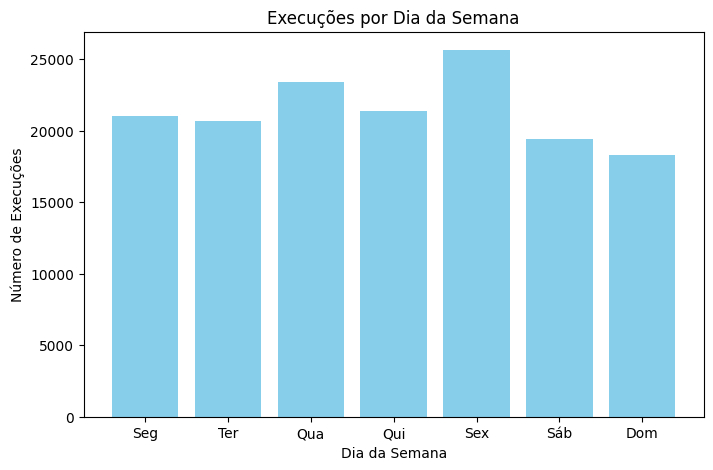

In [ ]:
contagem_por_dia = novo_df.groupby("dia_semana").size() #agrupa por dias da semana

# grafico
plt.figure(figsize=(8,5)) #Define o tamanho da figura a ser plotada no gráfico, largura 8, altura 5
plt.bar(contagem_por_dia.index, contagem_por_dia.values,color="skyblue") # bara vertical

plt.title("Execuções por Dia da Semana")  # título do gráfico
plt.xlabel("Dia da Semana")  # rótulo do eixo X
plt.ylabel("Número de Execuções")  # rótulo do eixo Y

dias = ["Seg", "Ter", "Qua", "Qui", "Sex", "Sáb", "Dom"] #lista com nomes dos dias da semana em portugues

plt.xticks(contagem_por_dia.index, dias) # Substitui os números do eixo X pelos nomes dos dias.


plt.savefig("execucoes_por_dia.png", dpi=300) # salva o grafico como png

plt.show() # mostrar o grafico 

In [ ]:

contagem = novo_df["shuffle"].value_counts() #Conta quantas execuções foram com shuffle ativado ou não

contagem.sum() #total de execucoes em geral

porcentagem_true = contagem[True] / contagem.sum() * 100 #Calcula a porcentagem com shuffle ativado.
porcentagem_false = contagem[False] / contagem.sum() * 100 #Calcula a porcentagem com shuffle desativado.

print(porcentagem_true) #exibe a  porcentagem com o modo aleatorio(shuffle)

print(porcentagem_false) #exibe a porcentagem sem o modo aleatorio(shuffle)


74.4581609502202
25.541839049779796


In [ ]:
novo_df["reason_end"].value_counts() #quantas vezes cada "motivo de término" aparece no Df.

cond1 = novo_df["reason_end"] == "endplay"  #Cria uma condição booleana para músicas finalizadas naturalmente.


cond2 = novo_df["reason_end"] == "trackdone"  #Cria uma condição booleana para músicas finalizadas por clique após execução total

cond1 | cond2 #combina os dois, Faz um OU lógico, qualquer linha que seja True em uma das condições vai ser True.

cond = cond1 | cond2

df_terminadas = novo_df[cond] # Seleciona todas as músicas que realmente chegaram ao fim.



terminadas_count = df_terminadas.groupby("track_name").size()#agrupa pelo nome da música e contar quantas vezes ela aparece


terminadas_count.sort_values(ascending=False).head(5) #Mostra as 5 músicas mais finalizadas.




track_name
Ode To The Mets        180
In the Blood           150
Dying Breed            137
Caution                136
For What It's Worth    130
dtype: int64